## Lesson-01 Assignment

>

##  复现代码

In [67]:
import random

simple = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article => 一个 | 这个
noun => 女人 | 篮球 | 桌子 | 小猫
verb => 看着 | 听着 | 看见
Adj => 蓝色的 | 好看的 | 小小的 | 年轻的
"""

def create_grammar(grammar_str, split='=>', line_split='\n'):
    grammar = {}
    for line in grammar_str.split(line_split):
        if not line.strip(): continue  # None > continue
        exp, stmt = line.split(split)
        grammar[exp.strip()] = [s.split() for s in stmt.split('|')]
    return grammar

print(create_grammar(simple))

example = create_grammar(simple)

{'sentence': [['noun_phrase', 'verb_phrase']], 'noun_phrase': [['Article', 'Adj*', 'noun']], 'Adj*': [['null'], ['Adj', 'Adj*']], 'verb_phrase': [['verb', 'noun_phrase']], 'Article': [['一个'], ['这个']], 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']], 'verb': [['看着'], ['听着'], ['看见']], 'Adj': [['蓝色的'], ['好看的'], ['小小的'], ['年轻的']]}


In [68]:
def generate(gram, target):
    if target not in gram: return target  # terminal expression 终止条件
    expanded = [generate(gram, t) for t in random.choice(gram[target])]
    return ''.join([e for e in expanded if e != 'null'])

In [8]:
print(generate(example, 'sentence'))

一个小猫看见这个桌子


In [9]:
import re
import pandas as pd

In [10]:
def preprocessing(csv_name):
    content = pd.read_csv(csv_name, encoding='gb18030')
    articles = content['content'].tolist()
    def token(string):
        return re.findall('\w+', string) 
    articles_clean = [''.join(token(str(a)))for a in articles]
    
    with open('article_9k.txt', 'w') as f:
        for a in articles_clean:
            f.write(a + '\n')
    
    print('Total articles:', len(articles))

In [11]:
import jieba

In [12]:
def cut(string): return list(jieba.cut(string))

TOKEN = []
for i, line in enumerate((open('article_9k.txt', encoding='utf-8'))):
    if i % 1000 == 0: print(i)
    # if i > 85000: break    
    TOKEN += cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\qw\AppData\Local\Temp\jieba.cache


0


Loading model cost 0.783 seconds.
Prefix dict has been built succesfully.


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000


In [13]:
from functools import reduce
from operator import add, mul
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
words_count = Counter(TOKEN)
words_count.most_common(100)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36867),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186),
 ('就', 26684),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('3', 25491),
 ('美国', 25485),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24376),
 ('1', 24182),
 ('这', 

In [15]:
def plot(num, trans_func=None):
    x = [i for i in range(num)]
    frequiences = [f for w, f in words_count.most_common(num)]
    y = frequiences if trans_func == None else trans_func(frequiences)
    plt.plot(x, y)

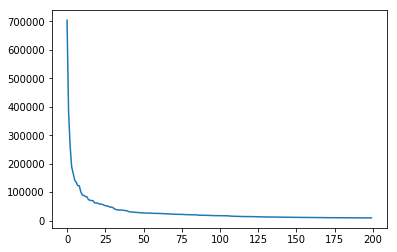

In [16]:
plot(200)

In [17]:
import numpy as np

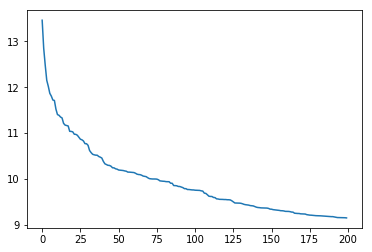

In [18]:
plot(200, np.log)

In [19]:
# probability
def prob(word):
    return words_count[word] / len(TOKEN)

prob('无知')

1.4189828345078916e-06

In [20]:
# 2-gram
TOKEN_2_GRAM = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]

words_count_2 = Counter(TOKEN_2_GRAM)

def prob_2_gram(word1, word2):
    if word1 + word2 in words_count_2: 
        return words_count_2[word1 + word2] / len(TOKEN_2_GRAM)
    else:
        return 1 / len(TOKEN_2_GRAM)

In [21]:
prob_2_gram('去', '吃饭')

7.946304775297799e-07

In [22]:
def get_probablity(sentence):
    """2 gram sentence prob"""
    words = cut(sentence)
    sentence_pro = 1
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2_gram(word, next_)
        sentence_pro *= probability
    return sentence_pro

In [23]:
# 判断第一部分生成句子的概率
for sen in [generate(gram=example, target='sentence') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 一个女人看着一个女人 with Prb: 8.406858712653339e-28
sentence: 这个好看的蓝色的蓝色的年轻的篮球看着一个好看的好看的小小的小猫 with Prb: 2.2539549407909485e-105
sentence: 一个女人看见这个好看的年轻的好看的蓝色的小猫 with Prb: 4.928987359010095e-73
sentence: 一个年轻的小小的小猫听着这个年轻的桌子 with Prb: 2.6492771248229757e-61
sentence: 一个年轻的小小的女人看着一个年轻的小小的蓝色的女人 with Prb: 1.8005540088294004e-76
sentence: 一个篮球听着这个蓝色的桌子 with Prb: 1.9101789563138843e-45
sentence: 这个篮球听着一个年轻的篮球 with Prb: 3.3277936100684336e-42
sentence: 这个小小的桌子听着这个女人 with Prb: 1.2115445118276601e-39
sentence: 一个好看的小小的篮球看见这个小小的年轻的年轻的桌子 with Prb: 6.988436938411302e-76
sentence: 一个女人看见这个年轻的小小的桌子 with Prb: 4.519523265341167e-46


In [24]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.8889745916921315e-66
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.5111796733537052e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.5242555959271015e-34
---- 真是一只好看的小猫 with probility 7.970947520145384e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.401139863085618e-20
---- 今晚火锅去吃我 with probility 5.396995716765105e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.8285698188632354e-22
---- 养乐多绿来一杯 with probility 3.2216203868326836e-15


>

## 基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: chatbot, text information extraction, machine translation

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: By git command lines; Jupyter is for checking code output immediately, displaying results and making notes; while Pycharm is for big project developing.

#### 2. What's the Probability Model?

Ans: A probability model is a mathematical representation of a random phenomenon. It is defined by its sample space, events within the sample space, and probabilities associated with each event.

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans: Weather forecasting, language model, machine translation

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans: Probability tells us the information behind data, gives us predictions about what will happen in the future. 
    
    The difficulties are that we can`t make sure the rationality of results, and which one is better. 

#### 5. What's the Language Model;

Ans: A Language model is a probability distribution over sequences of words. 

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans: Typo detection, machine translation, speech recognition.

#### 7. What's the 1-gram language model;

Ans: Only count a single word`s frequency when computing sentence probability.

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans: disadvantages: ignore the word dependence, P(I I I) maybe >> P(I am Harry).
    
    advantages: it`s stable and fast.

#### 9. What't the 2-gram models;

Ans: count two neighbor words` frequency when computing sentence probability.

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b10000_10000&sec=1561818705&di=95ca9ff2ff37fcb88ae47b82c7079feb&src=http://s7.sinaimg.cn/mw690/006BKUGwzy75VK46FMi66&690)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

第一个语法：

In [25]:
swordsman = '''
swordsman = 声明 自报家门 缘由 行为
声明 = 上圣 敬语 ，
上圣 = 荆尊 | 剑圣 | 吾王
敬语 = 在上 | 圣听
自报家门 = 主语 师承 身份等级
主语 = 吾 | 缁衣剑客
师承 = 绝息剑 | 逍遥剑
身份等级 = 第 代数 传人
代数 = 66 | 77 | 99
缘由 = 替天行道 | 劫富济贫 | 路见不平
行为 = 诛杀 恶贼
恶贼 = 小明 | 小凯 | 小芳
'''

第二个语法：

In [31]:
houseman = '''
houseman = 称谓 打招呼 询问 业务 结尾
形容 = 尊贵的 | 高贵的
称谓 = 形容 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好! | 您好! 
询问 = 请问你要 | 您需要
业务 = 汗血宝马 | 赤兔马 | 白龙马
结尾 = 吗？ | 不？
'''

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

In [28]:
generate(create_grammar(swordsman, split='='), 'swordsman')

'剑圣在上，吾逍遥剑第99传人替天行道诛杀小明'

In [32]:
generate(create_grammar(houseman, split='='), 'houseman')

'尊贵的先生,您好!您需要汗血宝马不？'

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [36]:
def generate_n(gram, target, n):
    sens = []
    for i in range(n):
        sen = generate(create_grammar(gram, split='='), target=target)
        sens.append(sen)
        # print(generate(create_grammar(gram, split='='), target=target))
    return sens

In [37]:
generate_n(swordsman, 'swordsman', 5)

['吾王圣听，吾逍遥剑第99传人路见不平诛杀小明',
 '剑圣圣听，吾逍遥剑第77传人替天行道诛杀小明',
 '剑圣在上，缁衣剑客逍遥剑第99传人劫富济贫诛杀小明',
 '荆尊在上，缁衣剑客逍遥剑第66传人替天行道诛杀小明',
 '剑圣圣听，吾绝息剑第66传人劫富济贫诛杀小凯']

>

#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

In [3]:
import requests

In [43]:
request_1 = requests.get("https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz")
with open('Insurance_train.txt.gz', 'wb') as f:
    f.write(request_1.content)

In [12]:
import gzip, os, shutil
with gzip.GzipFile('Insurance_train.txt.gz') as zipf:
    open('Insurance_train.txt', "wb+").write(zipf.read())     

In [4]:
# ! curl https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
request_2 = requests.get("https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv")
with open('movie_comments.csv', 'wb') as f:
    f.write(request_2.content)

In [13]:
import pandas as pd

In [16]:
movie_data = pd.read_csv('movie_comments.csv')
movie_data.sample(10)

D:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,link,name,comment,star
130037,128690,https://movie.douban.com/subject/1292222/,出租车司机 Taxi Driver,朱帝福斯特当年多萝莉，电影出名的只是引起刺杀里根的事吧,3
257117,255770,https://movie.douban.com/subject/3715144/,烈日当空 烈日當空,喜欢到没有词形容,5
193770,192423,https://movie.douban.com/subject/1293764/,与狼共舞 Dances with Wolves,忘了什么时候看的了，剧情也记得个大概。,4
225478,224131,https://movie.douban.com/subject/25863024/,仙球大战,乡村非主流综艺网大级超级大喜（lan）剧（pian）,1
247790,246443,https://movie.douban.com/subject/1309226/,小花,陈冲和刘晓庆还带着萌萌的婴儿肥，纯真的美，唐国强帅的秒杀韩国欧巴。片子整体还是浓浓的主旋律。,3
186499,185152,https://movie.douban.com/subject/1306472/,晚餐游戏 Le dîner de cons,中间很棒，就是结尾实在太圣母啦！,3
131470,130123,https://movie.douban.com/subject/3178770/,马达加斯加3 Madagascar 3: Europe's Most Wanted,视觉效果相当棒,4
194995,193648,https://movie.douban.com/subject/1305724/,X战警2 X2,这么酷！！,5
131547,130200,https://movie.douban.com/subject/3178770/,马达加斯加3 Madagascar 3: Europe's Most Wanted,颜色很绚丽，3D效果还不错。配乐有些偷懒，都用的老歌。,4
217969,216622,https://movie.douban.com/subject/1921686/,街头霸王: 春丽传奇 Street Fighter: The Legend of Chun-Li,春丽真美丽,4


In [60]:
def token(string):
        return re.findall('[\u4e00-\u9fa5]+', string) 

# print(token("颜色很绚丽，3D效果还不错。配乐有些偷懒，都用的老歌。"))

m = map(token, ["颜色很绚丽，3D效果还不错。配乐有些偷懒，都用的老歌。", 
                "颜色很绚丽，3D效果还不错。配乐有些偷懒，都用的老歌。"])
for a in m:
    print(a)

['颜色很绚丽', '效果还不错', '配乐有些偷懒', '都用的老歌']
['颜色很绚丽', '效果还不错', '配乐有些偷懒', '都用的老歌']


In [56]:
import re
import jieba
from functools import reduce

def filte(string):
#     print(string)
    return re.findall('[\u4e00-\u9fa5]+', string) 

def cut(string):
#     print(string)
    return jieba.cut(string)
    
def preprocessing(content):
    "content: dataframe of comments"
    comments = content.tolist()
    comments_clean = map(filte, comments)
    TOKEN = []
    for comment in comments_clean:
        for sen in comment:
            TOKEN += list(cut(sen))
    print('Total tokens:', len(TOKEN))
    return TOKEN

In [57]:
TOKEN = preprocessing(movie_data.comment.dropna())

Total tokens: 4410111


In [59]:
from collections import Counter

words_count = Counter(TOKEN)
words_count.most_common(50)

[('的', 328305),
 ('了', 102410),
 ('是', 72753),
 ('我', 49980),
 ('都', 36284),
 ('很', 34705),
 ('看', 34388),
 ('电影', 33753),
 ('也', 32055),
 ('和', 31316),
 ('在', 31245),
 ('不', 28475),
 ('有', 27968),
 ('就', 25662),
 ('人', 24231),
 ('好', 23242),
 ('啊', 20859),
 ('还', 17529),
 ('一个', 17343),
 ('你', 17229),
 ('这', 16940),
 ('还是', 16426),
 ('但', 15496),
 ('故事', 15050),
 ('没有', 14343),
 ('就是', 14016),
 ('喜欢', 13561),
 ('让', 13328),
 ('太', 12978),
 ('又', 11556),
 ('剧情', 11373),
 ('没', 10895),
 ('说', 10797),
 ('吧', 10752),
 ('他', 10641),
 ('不错', 10416),
 ('到', 10405),
 ('给', 10319),
 ('得', 10148),
 ('上', 10140),
 ('这个', 10056),
 ('被', 9937),
 ('对', 9856),
 ('最后', 9692),
 ('一部', 9691),
 ('片子', 9594),
 ('能', 9583),
 ('什么', 9565),
 ('多', 9267),
 ('与', 9163)]

In [63]:
# bigram
TOKEN_bigram = [''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
words_count_2 = Counter(TOKEN_bigram)

In [69]:
from operator import add

def unigram(word):
    return words_count[word] / len(TOKEN)

def bigram(w1, w2):
    if w1 + w2 in words_count_2:
        return words_count_2[w1 + w2] / len(TOKEN_bigram)
    else:
        return 1 / len(TOKEN_bigram)
    
def sentence_probablity(sen):
    words = reduce(add, [list(jieba.cut(s)) for s in filte(sen)])
    sentence_pro = 1
    for i, word in enumerate(words[:-2]):
        probability = bigram(word, words[i+1])
        sentence_pro *= probability
    return sentence_pro

In [70]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentence_probablity(s1), sentence_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 3.332630757480242e-47
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.333052302992097e-47
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.7649010280967494e-23
---- 真是一只好看的小猫 with probility 1.7511444090098942e-17
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 1.0180439868561215e-11
---- 今晚火锅去吃我 with probility 2.3317502117308844e-19
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 5.141636297253139e-14
---- 养乐多绿来一杯 with probility 2.2675176509242743e-07


> 

#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



In [80]:
def generate_best(n, gram, target, lm, m):
    """n: num of sentence
       m: m-gram language model"""
    sen_and_score = []
    for i in range(n):
        sen = generate(create_grammar(gram), target)
        words = reduce(add, [list(jieba.cut(s)) for s in filte(sen)])
        sentence_pro = 1
        for i, word in enumerate(words[:-m]):
            probability = lm(*words[i:i+m])
            sentence_pro *= probability
        sen_and_score += [(sen, sentence_pro)]
    print(sen_and_score)
    sort_list = sorted(sen_and_score, key=lambda x: x[1], reverse=True)
    print(sort_list)
    return sort_list[0]

In [81]:
generate_best(10, simple, target='sentence', lm=bigram, m=2)

[('一个桌子看见一个小小的蓝色的女人', 3.2445649880320158e-37), ('这个篮球听着这个篮球', 1.0080208399984967e-23), ('这个年轻的篮球看着这个好看的桌子', 6.23302358842027e-39), ('一个年轻的年轻的小小的篮球看着一个女人', 1.2933273443629323e-44), ('一个好看的蓝色的好看的小猫听着这个年轻的小小的小小的桌子', 2.7570927719330856e-73), ('这个篮球看见一个年轻的小猫', 1.0985531260140523e-29), ('一个好看的小猫看着这个女人', 1.62067457791749e-28), ('一个小猫看着一个篮球', 3.4976253175963264e-20), ('这个年轻的小小的桌子看着一个小猫', 9.15057038099352e-37), ('一个桌子看着这个年轻的女人', 8.967780620522879e-31)]
[('一个小猫看着一个篮球', 3.4976253175963264e-20), ('这个篮球听着这个篮球', 1.0080208399984967e-23), ('一个好看的小猫看着这个女人', 1.62067457791749e-28), ('这个篮球看见一个年轻的小猫', 1.0985531260140523e-29), ('一个桌子看着这个年轻的女人', 8.967780620522879e-31), ('这个年轻的小小的桌子看着一个小猫', 9.15057038099352e-37), ('一个桌子看见一个小小的蓝色的女人', 3.2445649880320158e-37), ('这个年轻的篮球看着这个好看的桌子', 6.23302358842027e-39), ('一个年轻的年轻的小小的篮球看着一个女人', 1.2933273443629323e-44), ('一个好看的蓝色的好看的小猫听着这个年轻的小小的小小的桌子', 2.7570927719330856e-73)]


('一个小猫看着一个篮球', 3.4976253175963264e-20)

提示，要实现这个函数，你需要Python的sorted函数

In [13]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [15]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [16]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [17]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

>

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans: 问题有两个，只能生成给定形式的句子，同时判定句子合理性依赖使用的语料库；另外，当出现低频的合理词汇，或者语料库中不存在，统计语言模型效果会变差。
   并且，模型本身并不具备语言理解、推理的能力。
   提升效果的途径，1：使用更大的语料库；2：同时使用多种n-gram进行计算；使用更高级的算法生成多样的合理的语法结构。